In [1]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import gridspec
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel, WhiteKernel)

In [2]:
kernels = [RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)),
           RationalQuadratic(length_scale=1.0, alpha=0.1),
           ExpSineSquared(length_scale=1.0, periodicity=3.0,
                                length_scale_bounds=(0.1, 10.0),
                                periodicity_bounds=(1.0, 10.0)),
           ConstantKernel(0.1, (0.01, 10.0))
               * (DotProduct(sigma_0=1.0, sigma_0_bounds=(0.0, 10.0)) ** 2),
           Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0),
                        nu=1.5),
           WhiteKernel(noise_level=0.8)]

## Squared Exponentiated (RBF) Covariance Function

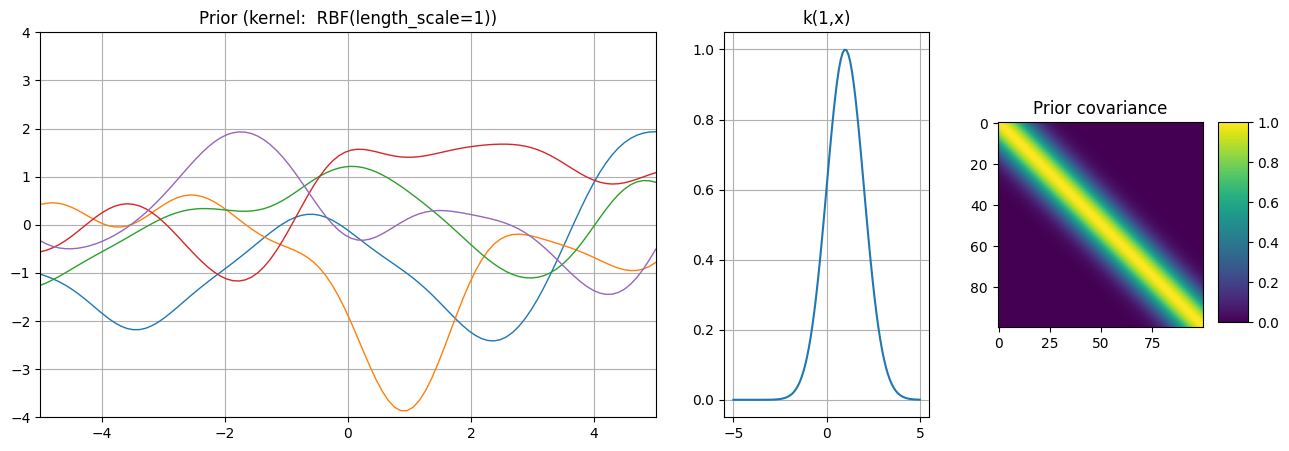

In [3]:
kernel = kernels[0]
# Specify Gaussian Process
gp = GaussianProcessRegressor(kernel=kernel)
X_ = np.linspace(-5, 5, 100)
y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
#plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
y_samples = gp.sample_y(X_[:, np.newaxis], 5)

fig = plt.figure(figsize=(15,5)) 
gs = gridspec.GridSpec(1, 3, width_ratios=[3, 1, 1], height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.set_title("Prior (kernel:  %s)" % kernel, fontsize=12)
ax0.plot(X_, y_samples, lw=1)
ax0.set_xlim(-5, 5)
ax0.set_ylim(-4, 4)
ax0.grid()

ax1 = plt.subplot(gs[1])
ax1.set_title('k(1,x)')
y1 = kernel.__call__(1, X_.reshape(-1,1)).reshape(-1,1)
ax1.plot(X_,y1)
ax1.grid()

cov = kernel.__call__(X_.reshape(-1,1))
ax2 = plt.subplot(gs[2])
ax2.set_title('Prior covariance')
h = ax2.imshow(cov)
#h = ax1.imshow(cov)
fig.colorbar(h, cax = fig.add_axes([0.91, 0.3, 0.02, 0.4]))

## Rational Quadratic Covariance Function

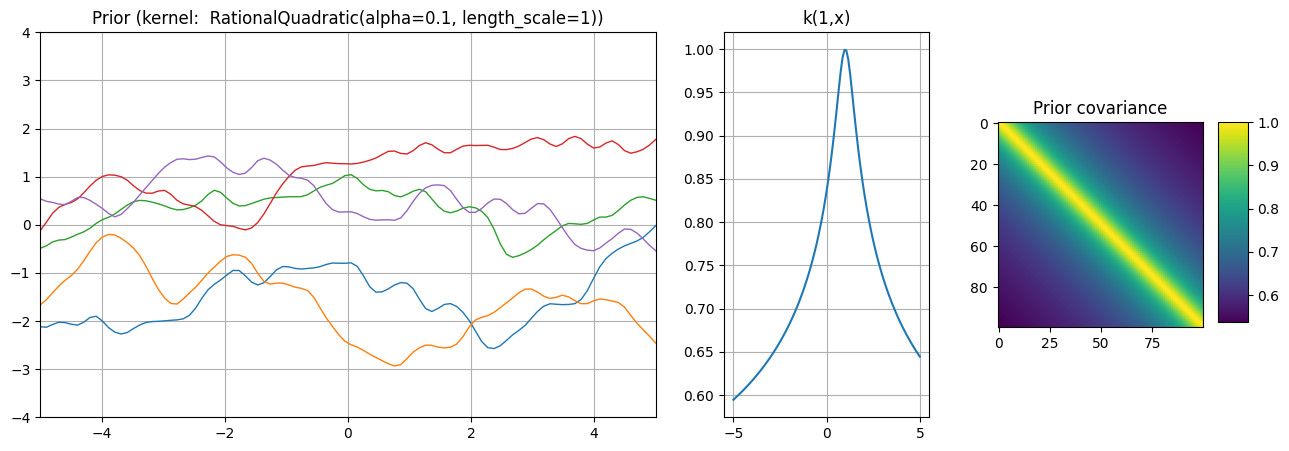

In [4]:
kernel = kernels[1]
# Specify Gaussian Process
gp = GaussianProcessRegressor(kernel=kernel)
X_ = np.linspace(-5, 5, 100)
y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
#plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
y_samples = gp.sample_y(X_[:, np.newaxis], 5)

fig = plt.figure(figsize=(15,5)) 
gs = gridspec.GridSpec(1, 3, width_ratios=[3, 1, 1], height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.set_title("Prior (kernel:  %s)" % kernel, fontsize=12)
ax0.plot(X_, y_samples, lw=1)
ax0.set_xlim(-5, 5)
ax0.set_ylim(-4, 4)
ax0.grid()

ax1 = plt.subplot(gs[1])
ax1.set_title('k(1,x)')
y1 = kernel.__call__(1, X_.reshape(-1,1))
ax1.plot(X_,y1.reshape(-1))
ax1.grid()

cov = kernel.__call__(X_.reshape(-1,1))
ax2 = plt.subplot(gs[2])
ax2.set_title('Prior covariance')
h = ax2.imshow(cov)
#h = ax1.imshow(cov)
fig.colorbar(h, cax = fig.add_axes([0.91, 0.3, 0.02, 0.4]))



## Exponentiated Sine Squared Function

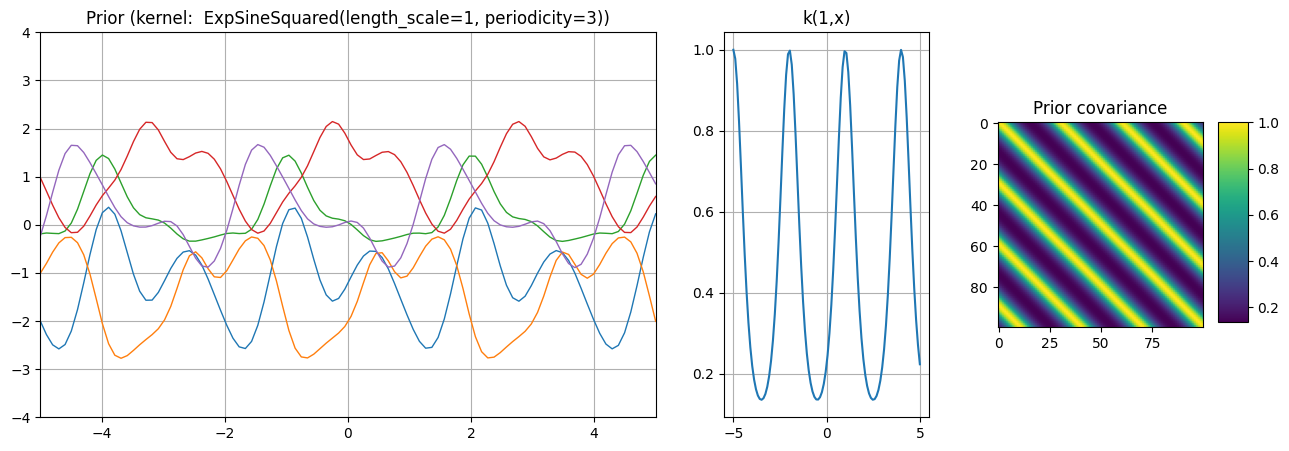

In [7]:
kernel = kernels[2]
# Specify Gaussian Process
gp = GaussianProcessRegressor(kernel=kernel)
X_ = np.linspace(-5, 5, 100)
y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
#plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
y_samples = gp.sample_y(X_[:, np.newaxis], 5)

fig = plt.figure(figsize=(15,5)) 
gs = gridspec.GridSpec(1, 3, width_ratios=[3, 1, 1], height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.set_title("Prior (kernel:  %s)" % kernel, fontsize=12)
ax0.plot(X_, y_samples, lw=1)
ax0.set_xlim(-5, 5)
ax0.set_ylim(-4, 4)
ax0.grid()

ax1 = plt.subplot(gs[1])
ax1.set_title('k(1,x)')
y1 = kernel.__call__(1, X_.reshape(-1,1))
ax1.plot(X_,y1.reshape(-1))
ax1.grid()

cov = kernel.__call__(X_.reshape(-1,1))
ax2 = plt.subplot(gs[2])
ax2.set_title('Prior covariance')
h = ax2.imshow(cov)
#h = ax1.imshow(cov)
fig.colorbar(h, cax = fig.add_axes([0.91, 0.3, 0.02, 0.4]))

## Dot Product Covariance Function

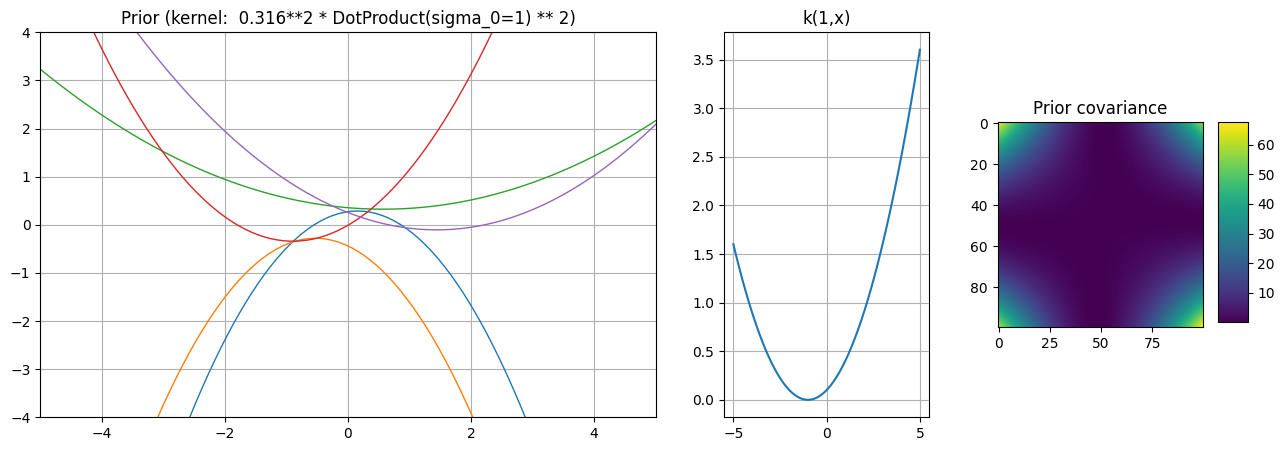

In [10]:
kernel = kernels[3]

gp = GaussianProcessRegressor(kernel=kernel)
X_ = np.linspace(-5, 5, 100)
y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
#plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
y_samples = gp.sample_y(X_[:, np.newaxis], 5)

fig = plt.figure(figsize=(15,5)) 
gs = gridspec.GridSpec(1, 3, width_ratios=[3, 1, 1], height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.set_title("Prior (kernel:  %s)" % kernel, fontsize=12)
ax0.plot(X_, y_samples, lw=1)
ax0.set_xlim(-5, 5)
ax0.set_ylim(-4, 4)
ax0.grid()

ax1 = plt.subplot(gs[1])
ax1.set_title('k(1,x)')
y1 = kernel.__call__(np.array([[1]]), X_.reshape(-1, 1))
ax1.plot(X_,y1.reshape(-1))
ax1.grid()

cov = kernel.__call__(X_.reshape(-1,1))
ax2 = plt.subplot(gs[2])
ax2.set_title('Prior covariance')
h = ax2.imshow(cov)
#h = ax1.imshow(cov)
fig.colorbar(h, cax = fig.add_axes([0.91, 0.3, 0.02, 0.4]))

## Matern Covariance Function

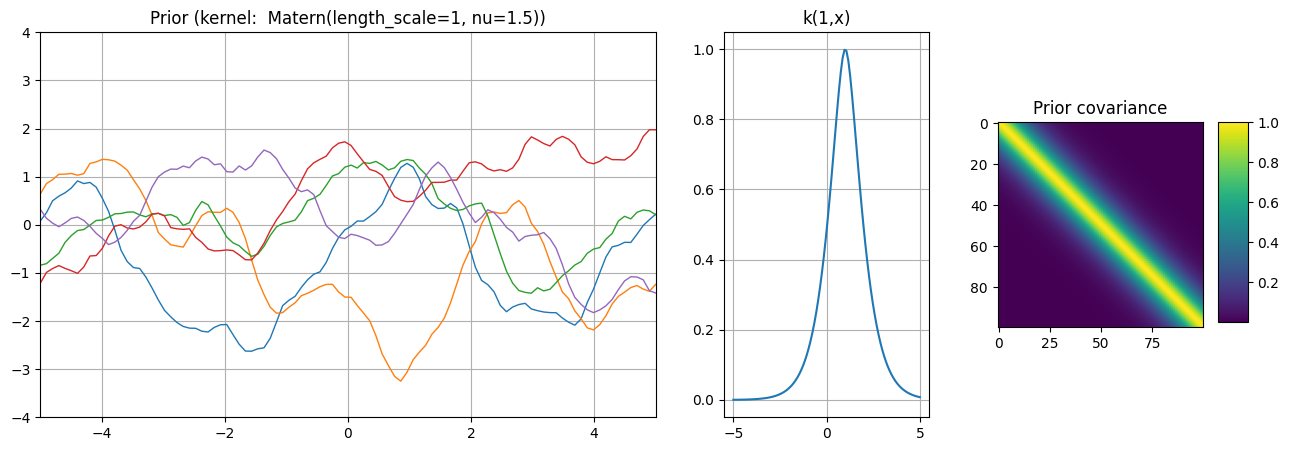

In [11]:
kernel = kernels[4]
# Specify Gaussian Process
gp = GaussianProcessRegressor(kernel=kernel)
X_ = np.linspace(-5, 5, 100)
y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
#plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
y_samples = gp.sample_y(X_[:, np.newaxis], 5)

fig = plt.figure(figsize=(15,5)) 
gs = gridspec.GridSpec(1, 3, width_ratios=[3, 1, 1], height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.set_title("Prior (kernel:  %s)" % kernel, fontsize=12)
ax0.plot(X_, y_samples, lw=1)
ax0.set_xlim(-5, 5)
ax0.set_ylim(-4, 4)
ax0.grid()

ax1 = plt.subplot(gs[1])
ax1.set_title('k(1,x)')
y1 = kernel.__call__(1, X_.reshape(-1,1))
ax1.plot(X_,y1.reshape(-1))
ax1.grid()

cov = kernel.__call__(X_.reshape(-1,1))
ax2 = plt.subplot(gs[2])
ax2.set_title('Prior covariance')
h = ax2.imshow(cov)
#h = ax1.imshow(cov)
fig.colorbar(h, cax = fig.add_axes([0.91, 0.3, 0.02, 0.4]))

## White Noise Covariance Function

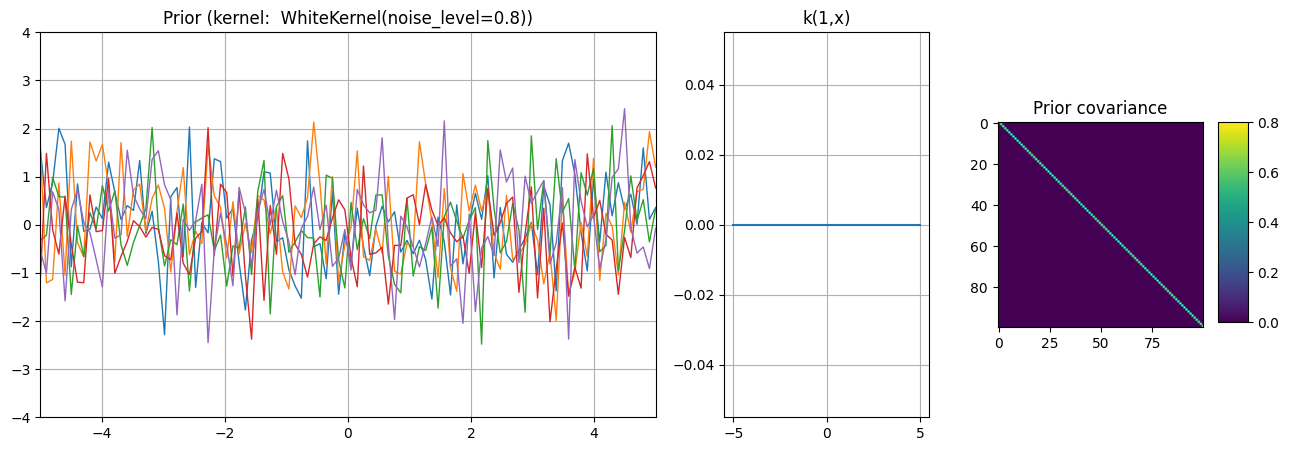

In [13]:
kernel = kernels[5]

gp = GaussianProcessRegressor(kernel=kernel)
X_ = np.linspace(-5, 5, 100)
y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
#plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
y_samples = gp.sample_y(X_[:, np.newaxis], 5)

fig = plt.figure(figsize=(15,5)) 
gs = gridspec.GridSpec(1, 3, width_ratios=[3, 1, 1], height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.set_title("Prior (kernel:  %s)" % kernel, fontsize=12)
ax0.plot(X_, y_samples, lw=1)
ax0.set_xlim(-5, 5)
ax0.set_ylim(-4, 4)
ax0.grid()

ax1 = plt.subplot(gs[1])
ax1.set_title('k(1,x)')
y1 = kernel.__call__(np.array([[1]]), X_.reshape(-1, 1))
ax1.plot(X_,y1.reshape(-1))
ax1.grid()

cov = kernel.__call__(X_.reshape(-1,1))
ax2 = plt.subplot(gs[2])
ax2.set_title('Prior covariance')
h = ax2.imshow(cov)
#h = ax1.imshow(cov)
fig.colorbar(h, cax = fig.add_axes([0.91, 0.3, 0.02, 0.4]))